<div align="center">
  <b> <font size="6">Classification using Decision Tree - Exercise </font> </b>
</div> 

In [1]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [2]:
df = pd.read_csv("E:\\MY LECTURES\\8.2021-09-03 DATA SCIENCE (KNU)\\3.Programs\\dataset\\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Extract features only Survived, Pclass, Sex, Age, Fare
filtered_df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
filtered_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


### Step 2: Apply EDA

In [4]:
filtered_df['Survived'].unique()

array([0, 1], dtype=int64)

In [5]:
filtered_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
filtered_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
filtered_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
filtered_df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

### Step 3. Pre-process and extract the features

In [9]:
X = filtered_df.drop('Survived',axis='columns')
Y = filtered_df['Survived']

In [10]:
# Input feature set
X.head(10)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
5,3,male,NaN,8.4583
6,1,male,54.0,51.8625
7,3,male,2.0,21.0750
8,3,female,27.0,11.1333
9,2,female,14.0,30.0708


In [11]:
# Do lable encoding 
X.Sex = X.Sex.map({'male': 1, 'female': 2})
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
# Treat NaN in age feature
X.Age = X.Age.fillna(X.Age.mean())
X.head(10)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,2,27.000000,11.1333
9,2,2,14.000000,30.0708


In [13]:
# Output feature
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Step 4. Split the data for training and testing

In [14]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Step 5. Training the model

In [15]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()

In [16]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
y_train_pred = DT_model.predict(x_train)

In [18]:
train_predicted_prob = DT_model.predict_proba(x_train)
train_predicted_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

##### Performance score for logistic regression

In [19]:
out = DT_model.score(x_train, y_train)
DT_Train_RS = np.round(out,2)*100
print("Performance score for training set :",DT_Train_RS,"%") 

Performance score for training set : 98.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

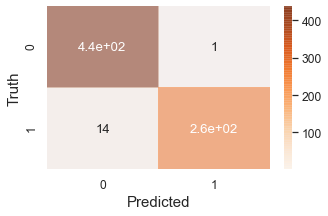

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [21]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       439
           1       1.00      0.95      0.97       273

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



In [22]:
# Accuracy score
temp = metrics.accuracy_score(y_train,y_train_pred)
DT_Train_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",DT_Train_Accuracy,"%")

Accuracy score :  98.0 %


In [23]:
# Precision score
temp = metrics.precision_score(y_train,y_train_pred)
DT_Train_Precision = np.round(temp,2)*100
print("Precision score : ",DT_Train_Precision,"%")

Precision score :  100.0 %


In [24]:
# Recall score
temp = metrics.recall_score(y_train,y_train_pred)
DT_Train_Recall = np.round(temp,2)*100
print("Recall score : ",DT_Train_Recall,"%")

Recall score :  95.0 %


In [25]:
# F1 score
temp = metrics.f1_score(y_train,y_train_pred)
DT_Train_F1 = np.round(temp,2)*100
print("F1 score : ",DT_Train_F1,"%")

F1 score :  97.0 %


In [26]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_train,y_train_pred)
DT_Train_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",DT_Train_CK,"%")

Cohen Kappa score :  96.0 %


##### ROC 

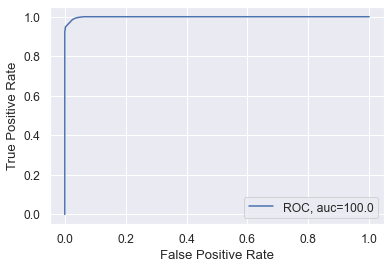

In [27]:
prob = train_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, prob)
DT_Train_AUC = np.round(metrics.roc_auc_score(y_train, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(DT_Train_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 6. Testing the model

In [28]:
y_test_pred = DT_model.predict(x_test)
y_test_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [29]:
test_predicted_prob = DT_model.predict_proba(x_test) 

##### Performance score for logistic regression

In [30]:
out = DT_model.score(x_test, y_test)
DT_Test_RS = np.round(out,2)*100
print("Performance score for training set :",DT_Test_RS,"%") 

Performance score for training set : 81.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

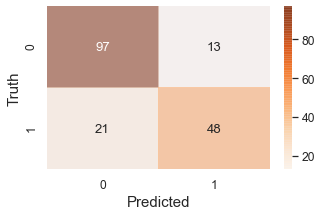

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [32]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [33]:
# Accuracy score
temp = metrics.accuracy_score(y_test,y_test_pred)
DT_Test_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",DT_Test_Accuracy,"%")

Accuracy score :  81.0 %


In [34]:
# Precision score
temp = metrics.precision_score(y_test,y_test_pred)
DT_Test_Precision = np.round(temp,2)*100
print("Precision score : ",DT_Test_Precision,"%")

Precision score :  79.0 %


In [35]:
# Recall score
temp = metrics.recall_score(y_test,y_test_pred)
DT_Test_Recall = np.round(temp,2)*100
print("Recall score : ",DT_Test_Recall,"%")

Recall score :  70.0 %


In [36]:
# F1 score
temp = metrics.f1_score(y_test,y_test_pred)
DT_Test_F1 = np.round(temp,2)*100
print("F1 score : ",DT_Test_F1,"%")

F1 score :  74.0 %


In [37]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_test,y_test_pred)
DT_Test_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",DT_Test_CK,"%")

Cohen Kappa score :  59.0 %


##### ROC 

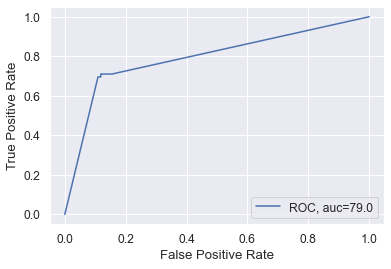

In [38]:
prob = test_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
DT_Test_AUC = np.round(metrics.roc_auc_score(y_test, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(DT_Test_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 7. Prediction using the model 

For Pclass: 1, Sex: 0, Age: 43, Fare: 50, passenger survived?

In [39]:
DT_model.predict([[1,0,43,50]])

array([0], dtype=int64)

### Step 8. Summary

In [40]:
print("             Decision Tree      ")
print("====================================================")
print("\t\tTraining phase       Testing phase ")
print("====================================================")
print("RS\t\t   ",DT_Train_RS,"%\t\t", DT_Test_RS,"%") 
print("Accuracy\t   ",DT_Train_Accuracy,"%\t\t", DT_Test_Accuracy,"%") 
print("Precision\t   ",DT_Train_Precision,"%\t\t", DT_Test_Precision,"%") 
print("Recall\t\t   ",DT_Train_Recall,"%\t\t", DT_Test_Recall,"%") 
print("F1\t\t   ",DT_Train_F1,"%\t\t", DT_Test_F1,"%") 
print("CK\t\t   ",DT_Train_CK,"%\t\t", DT_Test_CK,"%") 
print("AUC\t\t   ",DT_Train_AUC,"%\t\t", DT_Test_AUC,"%") 
print("====================================================")

             Decision Tree      
		Training phase       Testing phase 
RS		    98.0 %		 81.0 %
Accuracy	    98.0 %		 81.0 %
Precision	    100.0 %		 79.0 %
Recall		    95.0 %		 70.0 %
F1		    97.0 %		 74.0 %
CK		    96.0 %		 59.0 %
AUC		    100.0 %		 79.0 %
